# Create plots for final report

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [27]:
def plot_data(data, ylabel='Daily number of bike riders', legend=True, **kwargs):
    '''
    Plot daily bikerider count by mean day temperature, separate between business days and weekends.

    Parameters
    ----------
    data : pd.DataFrame
        Dataframe with columns 'temperature', 'is_busday' and 'rider_count'.
    ylabel : str
        Label for y-axis.

    Returns
    -------
    (plot)
    '''
    # plot data
    # TODO vielleicht nur outline der Symbole zeichnen? (Dann auf jeden Fall Farbe anpassen: orange sieht man dann fast nicht)
    # TODO use different symbols - such that points for weekend / business day can be distinguished even without color
    # TODO Größe der Symbole anpassen?
    plt.scatter(data[data['is_busday'] == True]['temperature'], data[data['is_busday'] == True]['rider_count'], label='data business day', color='orange', marker='D')
    plt.scatter(data[data['is_busday'] == False]['temperature'], data[data['is_busday'] == False]['rider_count'], label='data weekend', color='blue', marker='o')

    # legend
    plt.xlabel('Average daily temperature [°C]', fontsize=kwargs.get('fontsize_ticks', 14))
    plt.ylabel(ylabel, fontsize=kwargs.get('fontsize_ticks', 14))
    
    if legend:
        plt.legend(fontsize=kwargs.get('fontsize_legend', 14));

## Data with prediction intervals / prediction limits

In [3]:
# plot prediction intervals together with datapoints
def plot_data_with_pred_intervals(dat, ylabel=None, plot_limits=False, export_filename=None, legend=False, legend_outside=False):
    '''
    Plot prediction intervals together with datapoints.

    Parameters
    ----------
    dat : pd.DataFrame
        Dataframe with columns 'temperature', 'is_busday', 'rider_count', 'mean_predicted_rider_count', '2-5-quant' and '97-5-quant'
    plot_limits : bool
        Indicates whether to plot prediction interval limits or the whole interval.
    ylabel : str
        Label for y-axis.

    Returns
    -------
    (plot)
    '''
    # initialize figure
    plt.figure()

    # plot data
    if (ylabel is not None):
        plot_data(dat, ylabel=ylabel, legend=legend)
    else:
        plot_data(dat, legend=legend)


    # indices of business days / non-business days
    busday_indices = dat[dat['is_busday']].index
    nonbusday_indices = dat[~dat['is_busday']].index

    # plot 95% prediction intervals
    if(plot_limits): # plot limits of prediction interval
        plt.plot(
            dat.loc[busday_indices]['temperature'],
            dat.loc[busday_indices]['2-5-quant'],
            '--',
            color='orange',
            alpha=0.5,
            label='95% prediction limits business day'
        )
        plt.plot(
            dat.loc[busday_indices]['temperature'],
            dat.loc[busday_indices]['97-5-quant'],
            '--',
            color='orange',
            alpha=0.5,
        )

        plt.plot(
            dat.loc[nonbusday_indices]['temperature'],
            dat.loc[nonbusday_indices]['2-5-quant'],
            '--',
            color='blue',
            alpha=0.5,
            label='95% prediction limits weekend'
        )
        plt.plot(
            dat.loc[nonbusday_indices]['temperature'],
            dat.loc[nonbusday_indices]['97-5-quant'],
            '--',
            color='blue',
            alpha=0.5,
        )
    else:
        plt.vlines(x=dat.loc[busday_indices]['temperature'], ymin=dat.loc[busday_indices]['2-5-quant'], ymax=dat.loc[busday_indices]['97-5-quant'], color='orange', alpha=0.3, label='95% prediction interval business day')
        plt.vlines(x=dat.loc[nonbusday_indices]['temperature'], ymin=dat.loc[nonbusday_indices]['2-5-quant'], ymax=dat.loc[nonbusday_indices]['97-5-quant'], color='blue', alpha=0.3, label='95% prediction interval weekend')

    if legend:
        ax = plt.gca()
        lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) if legend_outside else ax.legend()
        
    if export_filename is not None:
        plt.savefig(export_filename, bbox_extra_artists=(lgd,) if legend else None, bbox_inches='tight') 

### Training data with prediction intervals / prediction limits

In [4]:
# import data
training_data_with_prediction_intervals = pd.read_pickle('./../data/results/training_data_prediction_characteristics.pkl')

# sort it by temperature
training_data_with_prediction_intervals.sort_values(by=['temperature'], inplace=True)

training_data_with_prediction_intervals

,standort,counter_site,channel_name,longitude,latitude,date,temperature,is_busday,rider_count,mean_predicted_rider_count,2-5-quant,97-5-quant
40,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,7.862301,47.99054,2021-02-11,-6.9,True,627,1515.469282,-343.560962,3371.988355
39,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,7.862301,47.99054,2021-02-10,-6.4,True,774,1577.934570,-263.526528,3410.878711
41,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,7.862301,47.99054,2021-02-12,-5.8,True,1025,1646.821520,-197.078804,3503.469632
15,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,7.862301,47.99054,2021-01-16,-5.6,False,421,735.798306,-785.540599,2262.849116
42,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,7.862301,47.99054,2021-02-13,-5.2,False,1221,779.974203,-766.307783,2316.329824
...,...,...,...,...,...,...,...,...,...,...,...,...
217,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,7.862301,47.99054,2021-08-13,23.3,True,4408,5351.008072,3478.728818,7211.598837
218,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,7.862301,47.99054,2021-08-14,23.4,False,3280,3729.585644,2214.011766,5271.530075
163,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,7.862301,47.99054,2021-06-18,24.2,True,5867,5472.776116,3618.151449,7315.737385
164,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,7.862301,47.99054,2021-06-19,24.4,False,4294,3840.793188,2295.146349,5390.205894


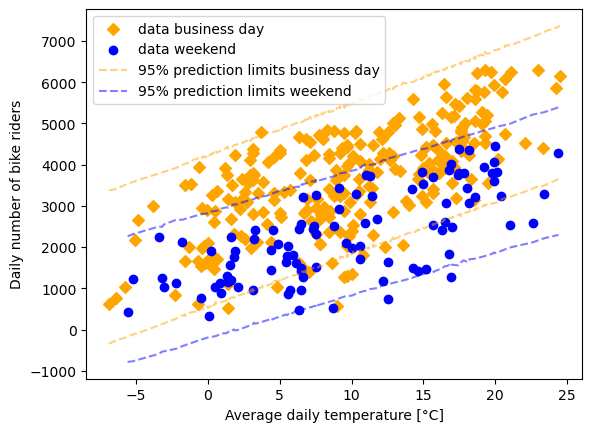

In [5]:
# different visualizations of prediction intervals
plot_data_with_pred_intervals(training_data_with_prediction_intervals, plot_limits=True, export_filename='training_data_with_prediction_intervals.pdf', legend=True)

### Test data with prediction intervals / prediction limits

In [6]:
# import data
test_data_with_prediction_intervals = pd.read_pickle('./../data/results/test_data_prediction_characteristics.pkl')

# sort it by temperature
test_data_with_prediction_intervals.sort_values(by=['temperature'], inplace=True)

test_data_with_prediction_intervals

,standort,counter_site,channel_name,longitude,latitude,date,temperature,is_busday,rider_count,mean_predicted_rider_count,2-5-quant,97-5-quant
48541,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-02-12,-7.6,True,54,1418.422660,-391.073381,3284.594802
48540,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-02-11,-7.5,True,36,1430.658071,-412.555148,3291.515016
48539,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-02-10,-6.9,True,36,1530.898389,-321.157256,3374.115444
48542,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-02-13,-6.6,False,37,630.725307,-929.114103,2155.149668
48538,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-02-09,-3.7,True,86,1925.072626,49.583867,3783.839777
...,...,...,...,...,...,...,...,...,...,...,...,...
48718,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-08-14,24.2,False,251,3810.238275,2293.158757,5342.288687
48661,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-06-16,24.5,True,533,5503.073583,3637.674841,7329.817215
48662,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-06-17,26.0,True,527,5692.467264,3851.163000,7521.083435
48663,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-06-18,26.7,True,466,5796.119142,3950.316284,7651.527080


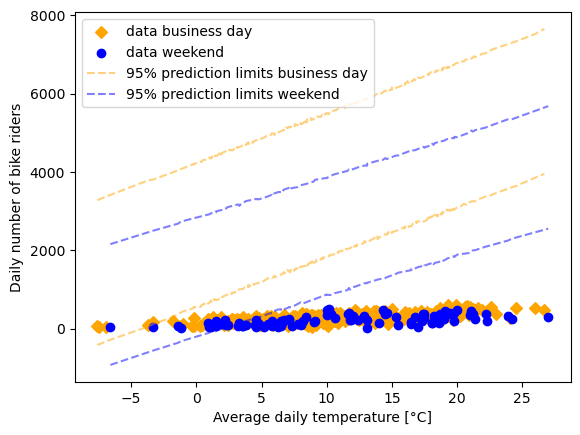

In [7]:
# different visualizations of prediction intervals
#plot_data_with_pred_intervals(test_data_with_prediction_intervals)
plot_data_with_pred_intervals(test_data_with_prediction_intervals, plot_limits=True, legend=True, export_filename='test_data_with_prediction_intervals.pdf')

### Normalized test data with prediction intervals / prediction limits

In [8]:
# import data
normalized_test_data_with_prediction_intervals = pd.read_pickle('./../data/results/normalized_test_data_prediction_characteristics.pkl')

# sort it by temperature
normalized_test_data_with_prediction_intervals.sort_values(by=['temperature'], inplace=True)

normalized_test_data_with_prediction_intervals

,standort,counter_site,channel_name,longitude,latitude,date,temperature,is_busday,rider_count,mean_predicted_rider_count,2-5-quant,97-5-quant
48541,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-02-12,-7.6,True,0.053633,0.183071,-0.133144,0.502790
48540,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-02-11,-7.5,True,0.022491,0.185983,-0.128851,0.500776
48539,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-02-10,-6.9,True,0.022491,0.199729,-0.113039,0.515064
48542,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-02-13,-6.6,False,0.024221,0.050279,-0.215917,0.318888
48538,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-02-09,-3.7,True,0.108997,0.266375,-0.047469,0.581646
...,...,...,...,...,...,...,...,...,...,...,...,...
48718,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-08-14,24.2,False,0.394464,0.582974,0.317973,0.853830
48661,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-06-16,24.5,True,0.882353,0.866524,0.550999,1.181910
48662,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-06-17,26.0,True,0.871972,0.898087,0.581546,1.214478
48663,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-06-18,26.7,True,0.766436,0.914894,0.598022,1.229305


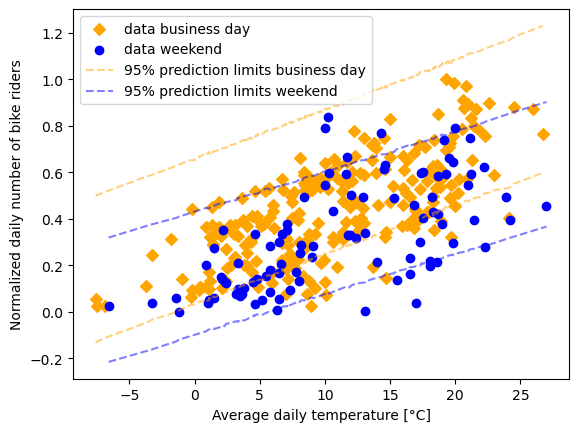

In [9]:
# different visualizations of prediction intervals
#plot_data_with_pred_intervals(normalized_test_data_with_prediction_intervals, 'Normalized daily number of bike riders')
plot_data_with_pred_intervals(normalized_test_data_with_prediction_intervals, 'Normalized daily number of bike riders', plot_limits=True, export_filename='normalized_test_data_with_prediction_intervals.pdf', legend=True)

## Data with mean posterior and credible intervals

In [10]:
def plot_linear_fit(intercept, slope, intercept_business_days, slope_interaction, label_non_busday_fit=None, label_busday_fit=None, alpha=1):
    # TODO kommentieren

    # plot fit
    x_temps = np.linspace(-7, 25, 10)
    plt.plot(x_temps, intercept +  x_temps * slope, label=label_non_busday_fit, color='blue', alpha=alpha)
    plt.plot(x_temps, intercept + intercept_business_days +  x_temps * (slope + slope_interaction), label=label_busday_fit, color='orange', alpha=alpha)
    plt.legend();

In [11]:
# import characteristics of the posterior distributions of the parameters
posterior_distribution_characteristics = pd.read_pickle('./../data/results/posterior_distribution_characteristics.pkl')
posterior_distribution_characteristics

,param_name,mean,95-hdi-lower,95-hdi-upper
0,beta_0_intercept_weekend,1314.546213,1071.202412,1557.146113
1,beta_1_slope_weekend,103.495754,83.040296,123.419305
2,beta_2_additional_intercept_business_day,1076.986808,764.431756,1394.415506
3,beta_3_additional_slope_business_day,23.438002,-2.329625,50.027456
4,intercept_business_day,2391.533022,2190.203119,2588.888324
5,slope_business_day,126.933757,109.805271,143.542143


TODO Kann vermutlich nicht einfach jeweils lower und upper HDI limits nehmen, um credible intervals zu plotten, richtig? Denn vielleicht z.B. korreliert...

In [12]:
# import samples from the posterior distributions for all paramters
# (one row represents parameters of one regression line)
params_posterior_distribution = pd.read_pickle('./../data/results/samples_from_parameter_posterior_distributions.pkl')
params_posterior_distribution

,beta_0_intercept_weekend,beta_1_slope_weekend,beta_2_additional_intercept_business_day,beta_3_additional_slope_business_day
0,1339.816268,96.120758,1066.555231,33.798989
1,1284.864336,100.300549,1108.687384,27.294633
2,1368.093618,110.143956,1057.965998,12.375918
3,1368.124985,92.543675,957.972236,43.593205
4,1582.780227,87.093209,858.449555,36.417623
...,...,...,...,...
19995,1401.474696,101.134534,822.728455,43.031257
19996,1478.399887,86.054427,955.858696,35.864547
19997,1449.856449,87.072808,832.852035,45.646584
19998,1519.983188,88.215134,899.731564,41.259323


TODO
Either sample randomly 40 (TODO adjust number) parameter configurations (that is: rows) from 'params_posterior_distribution' and plot those credible regression lines  
or  
take 95%-interval for all mean predictions and plot area

### Plot data with mean posterior and example regression lines

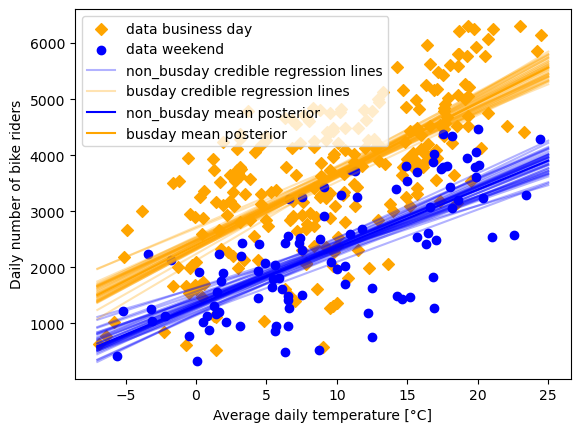

In [13]:
# plot data
plot_data(training_data_with_prediction_intervals)

# plot some credible regression lines as examples

num_posts_to_plot = 40 # number of credible regression lines

# draw random indices (--> random examples)
rand_indices = np.random.choice(a=len(params_posterior_distribution), size=num_posts_to_plot, replace=False)

# plot example credible regression lines
for i, idx in enumerate(rand_indices):

    if (i == 0): # add label for first plotted posterior
        plot_linear_fit(
            params_posterior_distribution.iloc[idx]['beta_0_intercept_weekend'],
            params_posterior_distribution.iloc[idx]['beta_1_slope_weekend'],
            params_posterior_distribution.iloc[idx]['beta_2_additional_intercept_business_day'],
            params_posterior_distribution.iloc[idx]['beta_3_additional_slope_business_day'],
            'non_busday credible regression lines', # TODO adjust label
            'busday credible regression lines',
            alpha=0.3)
    else:
        # TODO adjust alpha
        plot_linear_fit(
            params_posterior_distribution.iloc[idx]['beta_0_intercept_weekend'],
            params_posterior_distribution.iloc[idx]['beta_1_slope_weekend'],
            params_posterior_distribution.iloc[idx]['beta_2_additional_intercept_business_day'],
            params_posterior_distribution.iloc[idx]['beta_3_additional_slope_business_day'],
            alpha=0.3)
    
# plot mean posterior prediction
plot_linear_fit(
    posterior_distribution_characteristics.loc[posterior_distribution_characteristics['param_name'] == 'beta_0_intercept_weekend']['mean'].values[0],
    posterior_distribution_characteristics.loc[posterior_distribution_characteristics['param_name'] == 'beta_1_slope_weekend']['mean'].values[0],
    posterior_distribution_characteristics.loc[posterior_distribution_characteristics['param_name'] == 'beta_2_additional_intercept_business_day']['mean'].values[0],
    posterior_distribution_characteristics.loc[posterior_distribution_characteristics['param_name'] == 'beta_3_additional_slope_business_day']['mean'].values[0],
    label_busday_fit='busday mean posterior',
    label_non_busday_fit='non_busday mean posterior'
    )

### Plot data with mean posterior and credible intervals

In [14]:
# compute the limits of the 95% credible interval

# initialize dataframe that contains the limits of the credible interval
df_credible_interval = pd.DataFrame(columns=['temp', 'is_busday', '95-hdi-lower', '95-hdi-upper'])

x_temps = np.linspace(-7, 25, 100) # TODO use same range as for mean posteriors

# for a range of temperature values, check mean predictions of each regression line sampled from posterior
for x in x_temps:

    # mean predictions on weekends (i.e., point on one of the 20000 regression lines)
    mean_preds = params_posterior_distribution['beta_0_intercept_weekend'] + params_posterior_distribution['beta_1_slope_weekend'] * x
    
    # quantiles of mean predictions
    hdi_lower, hdi_upper = np.quantile(mean_preds, [0.025, 0.975])

    # summarize in dataframe
    part_df = pd.DataFrame({'temp': x, 'is_busday': 0, '95-hdi-lower': hdi_lower, '95-hdi-upper': hdi_upper}, index=[0])

    # append to overall dataframe
    df_credible_interval = pd.concat([df_credible_interval, part_df], ignore_index = True)


    # mean predictions on business days (i.e., point on one of the 20000 regression lines)
    mean_preds = params_posterior_distribution['beta_0_intercept_weekend'] + params_posterior_distribution['beta_2_additional_intercept_business_day'] + (params_posterior_distribution['beta_1_slope_weekend'] + params_posterior_distribution['beta_3_additional_slope_business_day']) * x
    
    # quantiles of mean predictions
    hdi_lower, hdi_upper = np.quantile(mean_preds, [0.025, 0.975])

    # summarize in dataframe
    part_df = pd.DataFrame({'temp': x, 'is_busday': 1, '95-hdi-lower': hdi_lower, '95-hdi-upper': hdi_upper}, index=[0])

    # append to overall dataframe
    df_credible_interval = pd.concat([df_credible_interval, part_df], ignore_index = True)

df_credible_interval

,temp,is_busday,95-hdi-lower,95-hdi-upper
0,-7.000000,0,224.170284,954.051207
1,-7.000000,1,1198.424734,1806.662384
2,-6.676768,0,263.306764,981.990172
3,-6.676768,1,1244.274223,1843.073748
4,-6.353535,0,302.696581,1009.839789
...,...,...,...,...
195,24.353535,1,5212.589416,5758.140224
196,24.676768,0,3526.978383,4210.040508
197,24.676768,1,5248.885146,5803.650144
198,25.000000,0,3553.307165,4249.556482


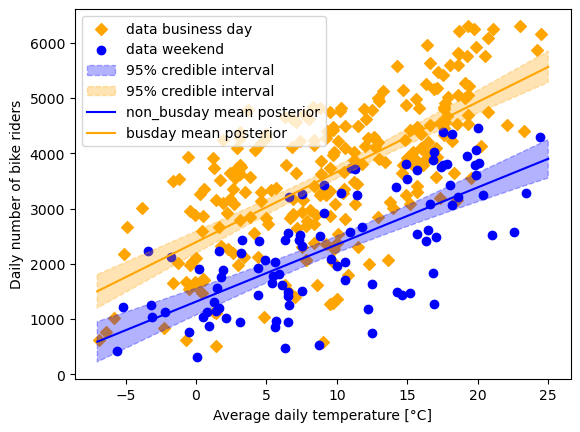

In [15]:
# plot data
plot_data(training_data_with_prediction_intervals)

# plot 95% credible interval
# TODO adjust label: "95% credible interval..." Vielleicht auch Unterscheidung, business day/weekend?
plt.fill_between(
    x_temps,
    df_credible_interval[df_credible_interval['is_busday']==0]['95-hdi-lower'].values,
    df_credible_interval[df_credible_interval['is_busday']==0]['95-hdi-upper'].values,
    color='blue', linestyle='--', alpha=0.3, label='95% credible interval')
plt.fill_between(
    x_temps,
    df_credible_interval[df_credible_interval['is_busday']==1]['95-hdi-lower'].values,
    df_credible_interval[df_credible_interval['is_busday']==1]['95-hdi-upper'].values,
    color='orange', linestyle='--', alpha=0.3, label='95% credible interval')
# TODO set colors for business days / weekend globally to not exchange them inadvertently in between cells

# plot mean posterior prediction
plot_linear_fit(
    posterior_distribution_characteristics.loc[posterior_distribution_characteristics['param_name'] == 'beta_0_intercept_weekend']['mean'].values[0],
    posterior_distribution_characteristics.loc[posterior_distribution_characteristics['param_name'] == 'beta_1_slope_weekend']['mean'].values[0],
    posterior_distribution_characteristics.loc[posterior_distribution_characteristics['param_name'] == 'beta_2_additional_intercept_business_day']['mean'].values[0],
    posterior_distribution_characteristics.loc[posterior_distribution_characteristics['param_name'] == 'beta_3_additional_slope_business_day']['mean'].values[0],
    label_busday_fit='busday mean posterior',
    label_non_busday_fit='non_busday mean posterior'
    )

In [16]:
training_data_with_prediction_intervals.head()

,standort,counter_site,channel_name,longitude,latitude,date,temperature,is_busday,rider_count,mean_predicted_rider_count,2-5-quant,97-5-quant
40,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,7.862301,47.99054,2021-02-11,-6.9,True,627,1515.469282,-343.560962,3371.988355
39,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,7.862301,47.99054,2021-02-10,-6.4,True,774,1577.934570,-263.526528,3410.878711
41,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,7.862301,47.99054,2021-02-12,-5.8,True,1025,1646.821520,-197.078804,3503.469632
15,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,7.862301,47.99054,2021-01-16,-5.6,False,421,735.798306,-785.540599,2262.849116
42,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,7.862301,47.99054,2021-02-13,-5.2,False,1221,779.974203,-766.307783,2316.329824


In [17]:
import seaborn as sns

In [18]:
sns.set_style("whitegrid")

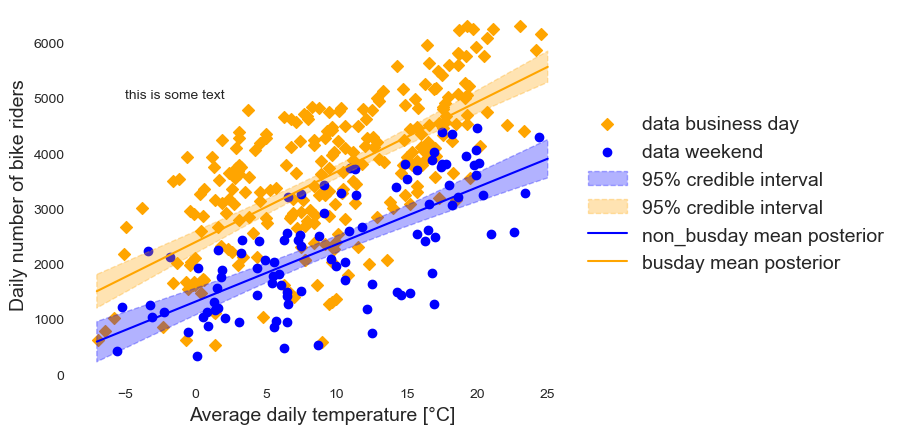

In [34]:
kwargs = {
    'fontsize_ticks' : 14,
    'fontsize_legend' : 14
}

# plot data
plot_data(training_data_with_prediction_intervals, **kwargs)

# plot 95% credible interval
# TODO adjust label: "95% credible interval..." Vielleicht auch Unterscheidung, business day/weekend?
plt.fill_between(
    x_temps,
    df_credible_interval[df_credible_interval['is_busday']==0]['95-hdi-lower'].values,
    df_credible_interval[df_credible_interval['is_busday']==0]['95-hdi-upper'].values,
    color='blue', linestyle='--', alpha=0.3, label='95% credible interval')
plt.fill_between(
    x_temps,
    df_credible_interval[df_credible_interval['is_busday']==1]['95-hdi-lower'].values,
    df_credible_interval[df_credible_interval['is_busday']==1]['95-hdi-upper'].values,
    color='orange', linestyle='--', alpha=0.3, label='95% credible interval')
# TODO set colors for business days / weekend globally to not exchange them inadvertently in between cells

# plot mean posterior prediction
plot_linear_fit(
    posterior_distribution_characteristics.loc[posterior_distribution_characteristics['param_name'] == 'beta_0_intercept_weekend']['mean'].values[0],
    posterior_distribution_characteristics.loc[posterior_distribution_characteristics['param_name'] == 'beta_1_slope_weekend']['mean'].values[0],
    posterior_distribution_characteristics.loc[posterior_distribution_characteristics['param_name'] == 'beta_2_additional_intercept_business_day']['mean'].values[0],
    posterior_distribution_characteristics.loc[posterior_distribution_characteristics['param_name'] == 'beta_3_additional_slope_business_day']['mean'].values[0],
    label_busday_fit='busday mean posterior',
    label_non_busday_fit='non_busday mean posterior'
    )


sns.despine(bottom = True, left = True)
ax = plt.gca()
ax.grid(False)
lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=14)
plt.text(x=-5, y=5000, s='this is some text')
plt.savefig('training_data_with_credible_intervals.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')  
plt.show()
